This kernel covers the investigations that are related to main research questions.

# 1. Variation Introduced due to Start Month Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
data_path = pathlib.Path(r'Preprocessed Data')
from annual_calculations import *
from trade_simulations import *
from long_term_simulations import *
df = pd.read_csv(data_path / 'SP500_whole.csv')
df_gold = pd.read_csv(data_path / "Gold_prices.csv")

## 1.1. Variation Display

In [2]:
display_df = compute_annual_returns_stocks_individually_display(df)
display_df.head(12)

  0%|          | 0/73 [00:00<?, ?it/s]

100%|██████████| 73/73 [00:00<00:00, 108.57it/s]


,Month,(%)Adjusted_Real_Returns
Period,,
"(1950, 1951)",1,23.909041
"(1950, 1951)",2,25.935916
"(1950, 1951)",3,22.955203
"(1950, 1951)",4,21.114372
"(1950, 1951)",5,17.749239
"(1950, 1951)",6,14.030462
"(1950, 1951)",7,24.381948
"(1950, 1951)",8,22.555467
"(1950, 1951)",9,21.501445


## 1.2. Correlation Between Mean Prices and Monthly Mean Prices

### 1.2.1. Correlation for Stocks

In [3]:
individual_calculation = compute_annual_returns_stocks_individually(df)
direct_calculation = compute_annual_returns_stocks(df)

print("The correlation between two results:", stats.pearsonr(individual_calculation["(%)Adjusted_Real_Returns"],direct_calculation["(%)Adjusted_Annual_Return_With_Dividends"]))

100%|██████████| 73/73 [00:00<00:00, 1736.18it/s]

The correlation between two results: PearsonRResult(statistic=0.999162622312241, pvalue=2.623935255451459e-100)


### 1.2.2. Correlation for Gold

In [4]:
individual_calculation = compute_annual_returns_gold_individually(df_gold)
direct_calculation = compute_annual_returns_commodity(df_gold)

print("The correlation between two results:", stats.pearsonr(individual_calculation["(%)Adjusted_Real_Returns"],direct_calculation["(%)Adjusted_Annual_Return"]))

100%|██████████| 73/73 [00:00<00:00, 1633.51it/s]

The correlation between two results: PearsonRResult(statistic=0.9984969154177242, pvalue=2.712077624414471e-91)


# 1. Checking the Requirements for Gold-SP500 Annual Return Comparison

In [5]:
annual_returns_stocks = compute_annual_returns_stocks(df)
annual_returns_gold = compute_annual_returns_commodity(df_gold)

100%|██████████| 73/73 [00:00<00:00, 1010.37it/s]


## 1.1. Are the distributions normal?

In [6]:
adjusted_gold_normality_results = stats.shapiro(annual_returns_gold["(%)Adjusted_Annual_Return"])
adjusted_SP_normality_results_nodivs = stats.shapiro(annual_returns_stocks["(%)Adjusted_Annual_Return_Without_Dividends"])
adjusted_SP_normality_results = stats.shapiro(annual_returns_stocks["(%)Adjusted_Annual_Return_With_Dividends"])

normality_df = pd.DataFrame(data = [adjusted_gold_normality_results,
                                    adjusted_SP_normality_results_nodivs,
                                    adjusted_SP_normality_results],
                                    columns = ["Test Statistic", "p-value"],
                                    index = ["Gold", "SP w.o. Div",
                                             "SP Div"])
normality_df

,Test Statistic,p-value
Gold,0.885272,0.000007
SP w.o. Div,0.993161,0.964988
SP Div,0.989988,0.836647


# 2. Correlation Between SPY and Index Prices

In [7]:
fund_vs_index = pd.read_csv(data_path / 'fund_vs_index.csv')
fund_vs_index['Ratio'] = fund_vs_index.Close_fund / fund_vs_index.Close_index
fund_vs_index['Ratio'].mean(), fund_vs_index['Ratio'].std()

(0.10009135682276281, 0.00027883713416550064)

# 3. Does purchase price is impotant for twenty years of investment strategy?

In [8]:
buying_price_simulation_results_stocks = simulate_twenty_years_of_investment(df, sample_size=30)
real_profit_deviation = pd.DataFrame(buying_price_simulation_results_stocks.groupby("Period")["% Change with Dividend"].std()).sort_values(by = "% Change with Dividend", ascending = False)
real_profit_deviation.head(10)

100%|██████████| 54/54 [00:16<00:00,  3.24it/s]


,% Change with Dividend
Period,
"(1979, 1999)",2.736313e-13
"(1980, 2000)",2.224194e-13
"(1981, 2001)",1.957764e-13
"(1978, 1998)",1.803735e-13
"(1982, 2002)",1.740867e-13
"(1977, 1997)",1.702033e-13
"(1984, 2004)",1.544145e-13
"(1952, 1972)",1.454983e-13
"(1976, 1996)",1.359988e-13


In [9]:
buying_price_simulation_results_gold = simulate_twenty_years_of_investment_gold(df_gold, sample_size=30)
real_profit_deviation_gold = pd.DataFrame(buying_price_simulation_results_gold.groupby("Period")["% Change"].std()).sort_values(by = "% Change", ascending = False)
real_profit_deviation_gold.head(10)

  0%|          | 0/54 [00:00<?, ?it/s]

100%|██████████| 54/54 [00:00<00:00, 181.95it/s]


,% Change
Period,
"(1972, 1992)",28.116030
"(1973, 1993)",23.965821
"(1968, 1988)",20.200097
"(2002, 2022)",18.537673
"(1969, 1989)",18.357148
"(2000, 2020)",17.928357
"(1999, 2019)",17.288218
"(1997, 2017)",14.894577
"(2003, 2023)",14.500490


# 4. Checking the Requirements for Gold-SP500 20 Year Return Comparison

In [10]:
result_stock = simulate_twenty_years_of_investment(df, sample_size=1)
result_gold = pd.DataFrame(buying_price_simulation_results_gold.groupby("Period")["% Change"].mean())

100%|██████████| 54/54 [00:00<00:00, 86.68it/s]


## 4.1. Are the distributions normal?

In [11]:
stats.shapiro(result_stock['% Change w.o. Dividend'])

ShapiroResult(statistic=0.9077686071395874, pvalue=0.0005306893726810813)

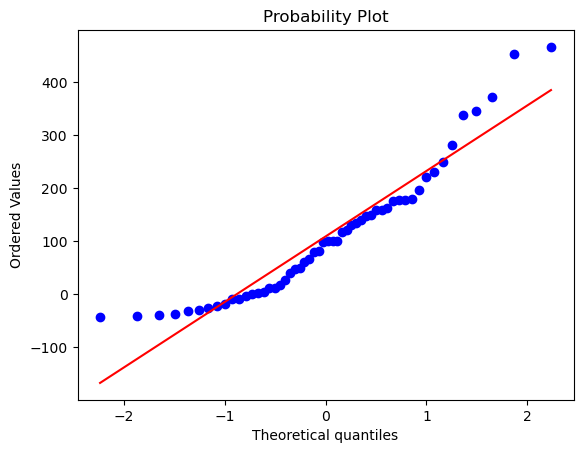

In [12]:
stats.probplot(result_stock['% Change w.o. Dividend'], plot = plt);

In [13]:
stats.shapiro(result_gold['% Change'])

ShapiroResult(statistic=0.9466741681098938, pvalue=0.017863910645246506)

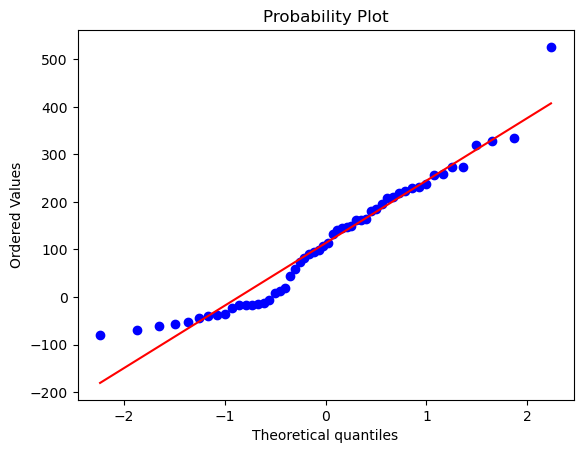

In [14]:
stats.probplot(result_gold['% Change'], plot = plt);

In [15]:
stats.shapiro(result_stock['% Change with Dividend'])

ShapiroResult(statistic=0.8654451370239258, pvalue=2.2246933440328576e-05)

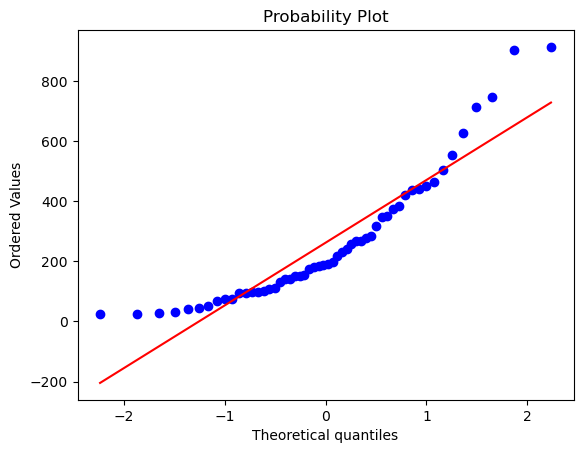

In [16]:
stats.probplot(result_stock['% Change with Dividend'], plot = plt);

# 5. Checking the Requirements of T-test for Trading vs Buy-Hold Comparison

In [17]:
trade_result = simulate_trade_EMA(df,verbose=False,EMA1 = 5, EMA2 = 8)
trade_result2 = simulate_trade_EMA(df,EMA1=3,EMA2=5)
control_result = simulate_control_group(df)

In [18]:
joinDF = pd.concat([control_result["(%)Annual_Return_Without_Dividends"],
                    trade_result["(%)Annual_Return_Without_Dividends"],
                    trade_result2["(%)Annual_Return_Without_Dividends"]],
                    axis = 1, join = 'inner'
                    )

In [19]:
stats.shapiro(control_result["(%)Annual_Return_Without_Dividends"])

ShapiroResult(statistic=0.9727676510810852, pvalue=0.11500608175992966)

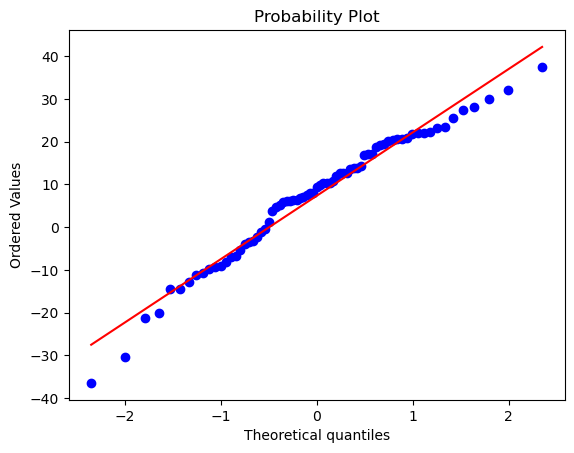

In [20]:
stats.probplot(control_result["(%)Annual_Return_Without_Dividends"], plot = plt);

In [21]:
stats.shapiro(trade_result["(%)Annual_Return_Without_Dividends"])

ShapiroResult(statistic=0.9898917078971863, pvalue=0.8314666748046875)

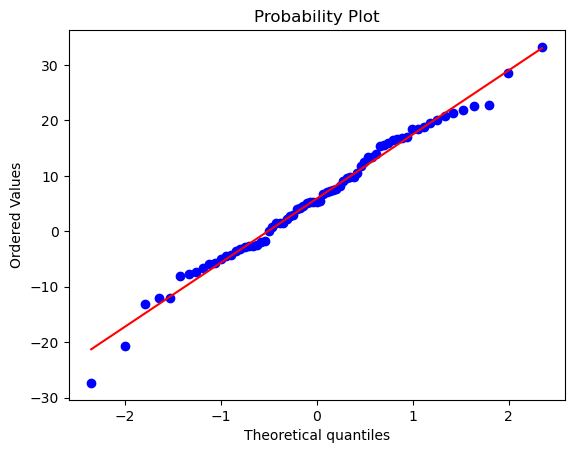

In [22]:
stats.probplot(trade_result["(%)Annual_Return_Without_Dividends"], plot = plt);

In [23]:
stats.shapiro(trade_result2["(%)Annual_Return_Without_Dividends"])

ShapiroResult(statistic=0.9605090022087097, pvalue=0.022189654409885406)

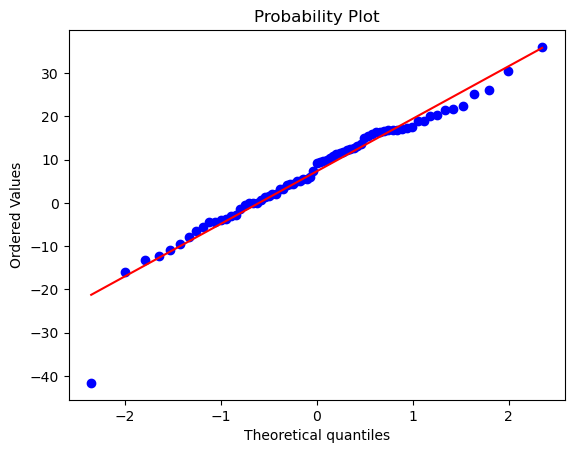

In [24]:
stats.probplot(trade_result2["(%)Annual_Return_Without_Dividends"], plot = plt);